## Method A

Algorithm Implementation -
Select at least Two Papers and reimplement the method proposed in the papers. Let's call them Method A and Method B. 

 -  Option 1: Implement the algorithm from scratch.
 - Option 2: Use the code provided by the authors (if available) and modify or analyze it as needed.
        (Ensure your implementation can adapt to the ECG5000 dataset.)
    - Document your implementation process and any challenges faced.

Evaluation -
Evaluate the algorithm’s performance using appropriate metrics (e.g., accuracy, sensitivity, specificity).
Compare the performance of your Methods A and B with KNN (you can call it Method C).

Method A Paper: https://ieeexplore.ieee.org/abstract/document/9662723

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras import layers, models, Input

from ecgLoader import load_ecg5000

X_train, X_test, y_train, y_test = load_ecg5000(one_hot=True)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]





Applied one-hot encoding: (3998, 5)


In [12]:
def attention_block(inputs):
    attention = layers.Dense(1, activation='tanh')(inputs)
    attention = layers.Flatten()(attention)
    attention = layers.Activation('softmax')(attention)
    attention = layers.RepeatVector(inputs.shape[-1])(attention)
    attention = layers.Permute([2, 1])(attention)
    return layers.Multiply()([inputs, attention])

def build_cnn_attention_model(input_shape=(140, 1), num_classes=5):
    inputs = Input(shape=input_shape)
    x = layers.Conv1D(64, kernel_size=5, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = attention_block(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
model = build_cnn_attention_model()
model.summary()

history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=64)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 140, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 140, 64)   │        384 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 70, 64)    │          0 │ conv1d_4[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 70, 128)   │     24,704 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_5     │ (None, 35, 128)   │          0 │ conv1d_5[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 35, 1)     │        129 │ max_pooling1d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 35)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 35)        │          0 │ flatten_4[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_2     │ (None, 128, 35)   │          0 │ activation_2[0][… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_2 (Permute) │ (None, 35, 128)   │          0 │ repeat_vector_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_2          │ (None, 35, 128)   │          0 │ max_pooling1d_5[… │
│ (Multiply)          │                   │            │ permute_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 4480)      │          0 │ multiply_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │    286,784 │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 5)         │        325 │ dense_7[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 312,326 (1.19 MB)

 Trainable params: 312,326 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8985 - loss: 1.0011 - val_accuracy: 0.9613 - val_loss: 0.1051
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9755 - loss: 0.1013 - val_accuracy: 0.9787 - val_loss: 0.0820
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9793 - loss: 0.0727 - val_accuracy: 0.9825 - val_loss: 0.0791
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9863 - loss: 0.0520 - val_accuracy: 0.9800 - val_loss: 0.0828
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9822 - loss: 0.0538 - val_accuracy: 0.9812 - val_loss: 0.0624
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9860 - loss: 0.0472 - val_accuracy: 0.9837 - val_loss: 0.0501
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9914 - loss: 0.0366 - val_accuracy: 0.9825 - val_loss: 0.0510
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9902 - loss: 0.0366 - val_accuracy: 0.9787 - v

In [14]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       591
           4       1.00      0.99      0.99       409

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



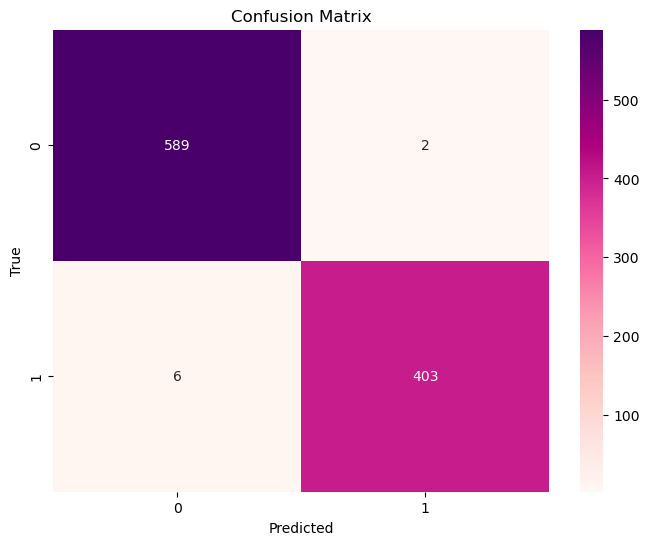

In [18]:
print(classification_report(y_true_labels, y_pred_labels))

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Let's try another dataset

In [19]:
from ecgLoader import load_heartbeat_dataset

X_train, X_test, y_train, y_test = load_heartbeat_dataset(one_hot=True)


X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(X_train.shape, y_train.shape)

(87556, 187, 1, 1) (87556, 5)


In [20]:
def build_cnn_attention_model_heartbeat(input_shape=(187, 1), num_classes=5):
    inputs = Input(shape=input_shape)
    x = layers.Conv1D(64, kernel_size=5, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = attention_block(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [21]:
model = build_cnn_attention_model_heartbeat()
model.summary()

history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=64)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 187, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 187, 64)   │        384 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_6     │ (None, 93, 64)    │          0 │ conv1d_6[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 93, 128)   │     24,704 │ max_pooling1d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_7     │ (None, 46, 128)   │          0 │ conv1d_7[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 46, 1)     │        129 │ max_pooling1d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 46)        │          0 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 46)        │          0 │ flatten_6[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_3     │ (None, 128, 46)   │          0 │ activation_3[0][… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_3 (Permute) │ (None, 46, 128)   │          0 │ repeat_vector_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_3          │ (None, 46, 128)   │          0 │ max_pooling1d_7[… │
│ (Multiply)          │                   │            │ permute_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 5888)      │          0 │ multiply_3[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │    376,896 │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 5)         │        325 │ dense_10[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 402,438 (1.54 MB)

 Trainable params: 402,438 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.8947 - loss: 0.4142 - val_accuracy: 0.9590 - val_loss: 0.1515
Epoch 2/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9596 - loss: 0.1463 - val_accuracy: 0.9672 - val_loss: 0.1187
Epoch 3/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9683 - loss: 0.1140 - val_accuracy: 0.9716 - val_loss: 0.1028
Epoch 4/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9722 - loss: 0.0982 - val_accuracy: 0.9758 - val_loss: 0.0915
Epoch 5/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9754 - loss: 0.0882 - val_accuracy: 0.9760 - val_loss: 0.0881
Epoch 6/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9784 - loss: 0.0764 - val_accuracy: 0.9749 - val_loss: 0.0899
Epoch 7/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9785 - loss: 0.0726 - val_accuracy: 0.9789 - val_loss: 0.0780
Epoch 8/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9819 -

In [22]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18160
           1       0.82      0.81      0.82       535
           2       0.94      0.95      0.94      1402
           3       0.87      0.72      0.78       158
           4       0.98      0.99      0.99      1635

    accuracy                           0.98     21890
   macro avg       0.92      0.89      0.90     21890
weighted avg       0.98      0.98      0.98     21890



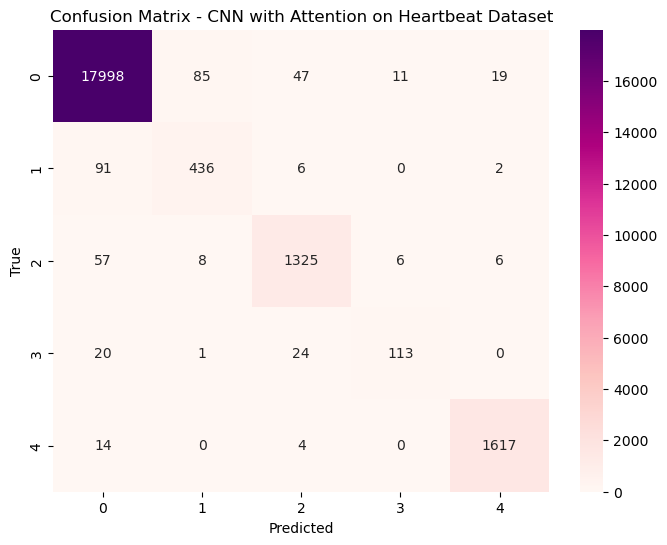

In [23]:
print(classification_report(y_true_labels, y_pred_labels))

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - CNN with Attention on Heartbeat Dataset')
plt.show()